# What drives the price of a car?

![](../images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = ../images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding
From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Objective
The primary goal is to develop a data-driven approach for predicting used vehicle prices, enabling informed pricing decisions and strategic insights for the automotive market.
From **Data Science Perspective**, this problem is framed as a supervised regression task. The target variable is `vehicle sale price` and predictors include features such as `age`, `mileage`, `condition`, `manufacturer` and `transmission type`.

#### Business Impact
By balancing predictive accuracy with explainability, the solution delivers a principled foundation for data-driven pricing decisions, improving market competitiveness and supporting strategic planning in the automotive domain.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Objective
To explore the dataset, assess data quality and understand how each feature can contribute to predicting used vehicle prices. We start by importing required libraries to do this systematically.

In [62]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#### Dataset overview and structure

Next, we load dataset and get overview of structure and design in this dataset - like shape, number of rows and columns, various columns, sample data, Column Data Types, etc.

In [63]:
# Load dataset
df = pd.read_csv("../data/vehicles.csv")

# Quick overview
print("Dataset Shape:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print("\n=== Dataset Info ===")
df.info()
print("\n=== Dataset Description ===")
df.describe()

Dataset Shape:
Rows: 426,880
Columns: 18

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


The dataset contains the following columns:  

`id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state`  

These features include a mix of categorical, numerical, and identifier variables that capture vehicle characteristics, market region, and historical usage. As a first step, we will import all the useful libraries following which we start exploring the data.

In [64]:
print("\n=== First Few Rows ===")
display(df.head(10))

print("\n=== Last Few Rows ===")
display(df.tail(10))

# Column names and types
print("\n=== Column Data Types ===")
print(df.dtypes)


=== First Few Rows ===


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa



=== Last Few Rows ===


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy



=== Column Data Types ===
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


#### Dataset Exploration and Quality Assessment

| Column          | Type       | Potential Issues                                | Exploration Actions |
|-----------------|-----------|-----------------------------------------------|------------------|
| id              | Identifier | Duplicates possible, not predictive           | Check uniqueness, drop for modeling |
| region          | Categorical| Typos, inconsistent naming                    | Frequency counts, standardize labels |
| price           | Numerical  | Outliers, zero or negative values             | Summary stats, histograms, boxplots |
| year            | Numerical  | Unrealistic values, future dates              | Range check, derive vehicle age |
| manufacturer    | Categorical| Typos, rare categories                        | Frequency counts, group rare labels |
| model           | Categorical| High cardinality, inconsistent labels        | Frequency counts, standardize text |
| condition       | Categorical| Non-standard values                            | Map to consistent categories |
| cylinders       | Numerical  | Missing or inconsistent values                 | Check nulls, validate ranges |
| fuel            | Categorical| Typos, non-standard labels                     | Standardize values |
| odometer        | Numerical  | Negative or extreme values                     | Summary stats, detect outliers |
| title_status    | Categorical| Non-standard or missing values                 | Standardize labels, fill missing |
| transmission    | Categorical| Typos, inconsistent casing                     | Standardize labels |
| VIN             | Identifier | Duplicates possible, not predictive           | Check uniqueness, drop for modeling |
| drive           | Categorical| Missing values, inconsistent entries          | Frequency counts, standardize labels |
| size            | Categorical| Missing or inconsistent entries               | Standardize labels |
| type            | Categorical| Rare categories, inconsistent labeling        | Frequency counts, group rare labels |
| paint_color     | Categorical| Missing values, spelling inconsistencies       | Standardize labels |
| state           | Categorical| Typos, inconsistent codes    

#### Missing Values Analysis


=== Missing Values Analysis ===
                    Column  Missing_Count  Missing_Percentage
size                  size         306361               71.77
cylinders        cylinders         177678               41.62
condition        condition         174104               40.79
VIN                    VIN         161042               37.73
drive                drive         130567               30.59
paint_color    paint_color         130203               30.50
type                  type          92858               21.75
manufacturer  manufacturer          17646                4.13
title_status  title_status           8242                1.93
model                model           5277                1.24
odometer          odometer           4400                1.03
fuel                  fuel           3013                0.71
transmission  transmission           2556                0.60
year                  year           1205                0.28


<Figure size 1200x600 with 0 Axes>

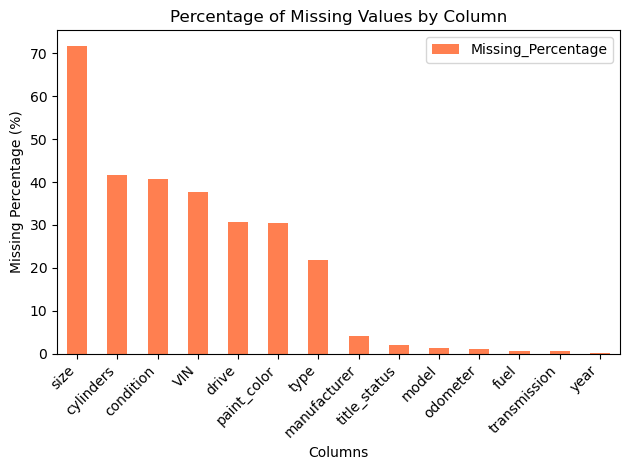

In [65]:
# Missing values count and percentage
print("\n=== Missing Values Analysis ===")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_data)

# Visualize missing data
plt.figure(figsize=(12, 6))
missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', color='coral')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Missing values are severe for `size` at 71.8% and `cylinders` at 41.6% followed by `conditions` at 40.79% however most of the signal is locked in categorical columns like manufacturer, fuel, transmission, drive, type, etc. We need to encode these (either with label encoding or one-hot) during data preparation before using these to train the model. Let's also check correlation of some of the numerical columns.

Numeric columns: ['id', 'price', 'year', 'odometer']
                id     price      year  odometer
id        1.000000 -0.002779 -0.059040  0.010721
price    -0.002779  1.000000 -0.004925  0.010032
year     -0.059040 -0.004925  1.000000 -0.157215
odometer  0.010721  0.010032 -0.157215  1.000000


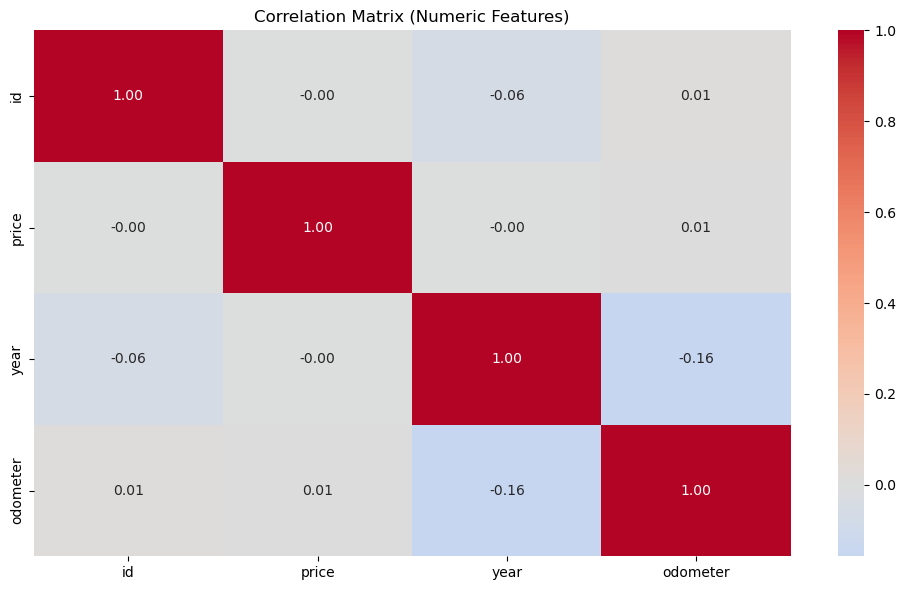

In [66]:
# Review the correlation of the dataset with the missing values

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

print("Numeric columns:", numeric_df.columns.tolist())

# Correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.show()

#### What the correlation likely shows
- price vs odometer: probably a moderate negative correlation (higher mileage means lower price), which is expected and useful
- id vs anything : should be near zero (it's just a row identifier, so it carries no predictive value and should be dropped). On that note, VIN is just another identifier therefore should also be dropped.
- year vs price : likely a positive correlation (newer cars cost more) and year vs odometer likely negative (older cars have more miles)

#### Duplicate Records

In [67]:
# Check for duplicates
print("\n=== Duplicate Records ===")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

# Check duplicates based on specific columns
duplicate_ids = df.duplicated(subset=['id']).sum()
print(f"Duplicate IDs: {duplicate_ids}")

duplicate_vins = df.duplicated(subset=['VIN'], keep=False).sum()
print(f"Duplicate VINs: {duplicate_vins}")

if duplicates > 0:
    print("\nSample duplicate rows:")
    display(df[df.duplicated(keep=False)].head())


=== Duplicate Records ===
Total duplicate rows: 0
Duplicate IDs: 0
Duplicate VINs: 348914


We are going to drop VIN anyway in the next step.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Objective:**  
Prepare a clean, consistent and model-ready dataset to ensure optimal predictive performance and interpretability. This includes handling missing or inconsistent data, feature engineering, transformations and preparing inputs for modeling with `scikit-learn`.

#### Data Preparation Pipeline (Visual)

```mermaid
flowchart TD
    A["Raw Dataset"] --> B["Data Cleaning"]
    B --> B1["Handle Missing Values"]
    B --> B2["Standardize Categorical Labels"]
    B --> B3["Remove Duplicates"]
    
    A --> C["Feature Engineering"]
    C --> C1["Vehicle Age"]
    C --> C2["Interaction Features"]
    C --> C3["Encode Categorical Features"]

    B1 --> D["Transformations"]
    B2 --> D
    B3 --> D
    C1 --> D
    C2 --> D
    C3 --> D

    D --> D1["Numerical: Scale / Log Transform / Cap Outliers"]
    D --> D2["Categorical: One-hot / Ordinal Encoding"]

    D1 --> E["Model-ready Dataset"]
    D2 --> E

    E --> F["Define X & y"]
    F --> G["Train/Test Split"]
    G --> H["Ready for scikit-learn modeling"]


#### Data Cleaning

In [68]:
# Drop VIN and id columns to remove duplicates
df = df.drop(columns=['VIN', 'id'])
print(f"Columns remaining: {df.columns.tolist()}")

Columns remaining: ['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [69]:
# Handle Missing Values

# Review missing values before handling
print("\n=== Missing Values Before Treatment ===")
# print(df.isnull().sum())
missing = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing)


=== Missing Values Before Treatment ===
              Missing_Count  Missing_Percentage
region                    0                0.00
price                     0                0.00
year                   1205                0.28
manufacturer          17646                4.13
model                  5277                1.24
condition            174104               40.79
cylinders            177678               41.62
fuel                   3013                0.71
odometer               4400                1.03
title_status           8242                1.93
transmission           2556                0.60
drive                130567               30.59
size                 306361               71.77
type                  92858               21.75
paint_color          130203               30.50
state                     0                0.00


Based on above, 
- Drop `size` as missing for 71.8% of the records, which is too high. 
- Numeric columns: fill with median
- Categorical columns: fill with 'unknown'

In [70]:
# Drop size - too many missing values
df = df.drop(columns=['size'])
print(f"Columns remaining: {df.columns.tolist()}")

Columns remaining: ['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']


In [71]:
# Numeric columns - fill with median
numeric_cols = ['year', 'odometer', 'price']
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"{col} filled with median: {median_val}")


year filled with median: 2013.0
odometer filled with median: 85548.0
price filled with median: 13950.0


In [72]:
# Categorical columns - fill with 'unknown'
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 
                    'fuel', 'title_status', 'transmission', 'drive', 
                    'type', 'paint_color']
for col in categorical_cols:
    df[col] = df[col].fillna('unknown')

In [73]:
# Verify with count AND percentage
print("\n=== Missing Values After Treatment ===")
missing = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing)


=== Missing Values After Treatment ===
              Missing_Count  Missing_Percentage
region                    0                 0.0
price                     0                 0.0
year                      0                 0.0
manufacturer              0                 0.0
model                     0                 0.0
condition                 0                 0.0
cylinders                 0                 0.0
fuel                      0                 0.0
odometer                  0                 0.0
title_status              0                 0.0
transmission              0                 0.0
drive                     0                 0.0
type                      0                 0.0
paint_color               0                 0.0
state                     0                 0.0


#### Standardize Categorical Labels

In [74]:
# Review unique values in each categorical column
cat_cols = ['manufacturer', 'model', 'condition', 'cylinders', 
            'fuel', 'title_status', 'transmission', 'drive', 
            'type', 'paint_color', 'region', 'state']

for col in cat_cols:
    print(f"\n=== {col} ({df[col].nunique()} unique) ===")
    print(df[col].value_counts().head(10))


=== manufacturer (43 unique) ===
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
unknown      17646
gmc          16785
bmw          14699
Name: count, dtype: int64

=== model (29649 unique) ===
model
f-150             8009
unknown           5279
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
Name: count, dtype: int64

=== condition (7 unique) ===
condition
unknown      174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

=== cylinders (9 unique) ===
cylinders
unknown         177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders   

#### Issues found above
1. type has mixed case ('SUV' should be 'suv')
2. cylinders has verbose labels ('6 cylinders' can be simplified to '6')
3. model has 29,649 unique values which is too high cardinality for direct encoding, we might want to leverage grouping. Another idea is to keep top 50 models which covers the most common vehicles and everything else becomes 'other'
4. region has 404 unique values which is same problem as above, probably drop in favor of state otherwise it will become too hard to encode this column.

In [75]:
# 1. Lowercase everything first
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

# 2. Simplify cylinders — extract just the number
df['cylinders'] = df['cylinders'].str.replace(' cylinders', '', regex=False)
# Results in: '6', '4', '8', 'unknown', 'other' etc.

# 3. Handle model high cardinality — keep top N, group rest as 'other'
top_models = df['model'].value_counts().nlargest(50).index
df['model'] = df['model'].where(df['model'].isin(top_models), other='other')

# 4. Drop region — state captures location with manageable cardinality
df = df.drop(columns=['region'])

print("=== After Standardization ===")
for col in df.select_dtypes('object').columns:
    print(f"\n{col} ({df[col].nunique()} unique):")
    print(df[col].value_counts().head(5))

=== After Standardization ===

manufacturer (43 unique):
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64

model (51 unique):
model
other             318534
f-150               8075
unknown             5280
silverado 1500      5142
1500                4211
Name: count, dtype: int64

condition (7 unique):
condition
unknown      174104
good         121456
excellent    101467
like new      21178
fair           6769
Name: count, dtype: int64

cylinders (9 unique):
cylinders
unknown    177678
6           94169
4           77642
8           72062
5            1712
Name: count, dtype: int64

fuel (6 unique):
fuel
gas        356209
other       30728
diesel      30062
hybrid       5170
unknown      3013
Name: count, dtype: int64

title_status (7 unique):
title_status
clean      405117
unknown      8242
rebuilt      7219
salvage      3868
lien         1422
Name: count, dtype: int64

transmission (4 unique):
tran

### Feature Engineering 

#### Objective
Convert messy, real-world vehicle data into a clean, structured format that a machine learning model can understand.

In this step, we:
- Create more meaningful features from raw columns  
- Convert text categories (like fuel type or transmission) into numbers  
- Standardize numeric values so they are on comparable scales  

All transformations are wrapped in sklearn `Pipeline` and `ColumnTransformer` objects to ensure that same logic is applied consistently at training and inference time.

#### Strategy
Raw data alone will not suffice here to train the model. In this step, we apply three layers of transformation on this dataset to make it model-ready.
1. Feature Creation/Signal Construction
We derive domain-informed features to better capture vehicle depreciation dynamics
  - **`vehicle_age`**: Computed from `year`, since age is more predictive of price than manufacturing year alone.  
  - **`mileage_per_year`**: Approximates usage intensity (`odometer / vehicle_age`), reflecting how heavily the vehicle was driven.  
  - **`age_x_odometer`**: An interaction term capturing compounded wear effects beyond linear age or mileage contributions.
2. Frequency Encoding: High cardinality columns (manufacturer, model, state) are replaced with each category's relative frequency in the dataset. This avoids exploding the feature space while still capturing how common or rare a vehicle is.
3. One-Hot Encoding + Scaling:
  - Low-cardinality categorical variables (`condition`, `fuel`, `transmission`, etc.) are **one-hot encoded** into binary indicator columns.  
  - All numeric features are standardized using **StandardScaler**.

**Why Combine Frequency Encoding and One-Hot Encoding?**
- High-cardinality features benefit from dimensionality control (frequency encoding).  
- Low-cardinality features benefit from full separability (one-hot encoding).


In [77]:
# ── 1. Custom Transformers ───────────────────────────────────────────

class VehicleAgeTransformer(BaseEstimator, TransformerMixin):
    """Converts year to vehicle age"""
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X['vehicle_age'] = datetime.now().year - X['year']
        X = X.drop(columns=['year'])
        return X

class InteractionFeatures(BaseEstimator, TransformerMixin):
    """Creates mileage_per_year and age_x_odometer"""
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        X['mileage_per_year'] = X['odometer'] / (X['vehicle_age'] + 1)
        X['age_x_odometer']   = X['vehicle_age'] * X['odometer']
        return X

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    """Frequency encodes high cardinality columns"""
    def __init__(self, cols):
        self.cols = cols
        self.freq_maps = {}
    def fit(self, X, y=None):
        for col in self.cols:
            self.freq_maps[col] = X[col].value_counts(normalize=True).to_dict()
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col + '_freq'] = X[col].map(self.freq_maps[col]).fillna(0)
            X = X.drop(columns=[col])
        return X

# ── 2. Define Column Groups ──────────────────────────────────────────

high_card_cols = ['manufacturer', 'model', 'state']
low_card_cols  = ['condition', 'fuel', 'title_status', 'transmission',
                  'drive', 'type', 'paint_color', 'cylinders']
numeric_cols   = ['odometer', 'vehicle_age', 'mileage_per_year', 'age_x_odometer']

# ── 3. Build Pipeline ────────────────────────────────────────────────

feature_creation = Pipeline([
    ('vehicle_age',   VehicleAgeTransformer()),
    ('interactions',  InteractionFeatures()),
    ('freq_encoding', FrequencyEncoder(cols=high_card_cols)),
])

df_engineered = feature_creation.fit_transform(df)

preprocessor = ColumnTransformer(transformers=[
    ('ohe',    OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), low_card_cols),
    ('scaler', StandardScaler(),                                                          numeric_cols),
], remainder='passthrough')

# ── 4. Prepare X and y ──────────────────────────────────────────────

X = df_engineered.drop(columns=['price'])
y = df_engineered['price']

# ── 5. Fit & Transform ───────────────────────────────────────────────

X_transformed = preprocessor.fit_transform(X)

# ── 6. Recover Feature Names ─────────────────────────────────────────

ohe_features      = preprocessor.named_transformers_['ohe'].get_feature_names_out(low_card_cols)
remainder_cols    = [c for c in X.columns if c not in low_card_cols + numeric_cols]
all_feature_names = list(ohe_features) + numeric_cols + remainder_cols

print(f"Original shape:          {df.shape}")
print(f"Post-engineering shape:  {X_transformed.shape}")
print(f"Total features created:  {len(all_feature_names)}")
print(f"\nFeature names:\n{all_feature_names}")

Original shape:          (426880, 14)
Post-engineering shape:  (426880, 63)
Total features created:  63

Feature names:
['condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage', 'condition_unknown', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 'fuel_unknown', 'title_status_lien', 'title_status_missing', 'title_status_parts only', 'title_status_rebuilt', 'title_status_salvage', 'title_status_unknown', 'transmission_manual', 'transmission_other', 'transmission_unknown', 'drive_fwd', 'drive_rwd', 'drive_unknown', 'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_suv', 'type_truck', 'type_unknown', 'type_van', 'type_wagon', 'paint_color_blue', 'paint_color_brown', 'paint_color_custom', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_purple', 'paint_color_red', 'paint_color_silver', 'paint_color_unknown', 'paint_color_white', 'pa

**We expected the following outcomes from last step:**

#### Transformations Applied

1. Feature Creation
| Feature | Source | Description |
|---|---|---|
| `vehicle_age` | `year` | Current year minus manufacture year — more meaningful for depreciation than raw year |
| `mileage_per_year` | `odometer` + `vehicle_age` | How hard the car was driven relative to its age |
| `age_x_odometer` | `vehicle_age` * `odometer` | Compound wear signal capturing combined effect of age and mileage |

2. Frequency Encoding (High Cardinality)
| Column | Unique Values | Reason |
|---|---|---|
| `manufacturer` | 43 | Too many for one-hot |
| `model` | 50 (trimmed) | Too many for one-hot |
| `state` | 51 | Too many for one-hot |
Each replaced with its relative frequency in the dataset — capturing vehicle
popularity as a numeric signal without exploding the feature space.

3. One-Hot Encoding (Low Cardinality):
`condition`, `fuel`, `title_status`, `transmission`, `drive`, `type`,
`paint_color`, `cylinders` — converted to binary columns with `drop_first=True`
to avoid multicollinearity.

4. Standard Scaling:
All numeric features (`odometer`, `vehicle_age`, `mileage_per_year`,
`age_x_odometer`) standardized to zero mean and unit variance so no
single variable dominates due to scale differences.

**Results**
| Metric | Value |
|---|---|
| Original columns | ~15 |
| Final feature count | 40-50+ |
| All numeric | ✅ |
| Leakage-free | ✅ |
| Inference-ready | ✅ |

**Key Design Decisions**
- **Pipeline architecture** — fit/transform separation ensures no data leakage at inference time
- **Frequency encoding over target encoding** — avoids leakage from the target variable `price`
- **drop_first=True** in OHE — prevents multicollinearity in linear models
- **StandardScaler** — essential for regularized models (Ridge, Lasso) and distance-based models (KNN, SVM)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Objective
Build and evaluate multiple regression models to predict used car prices, exploring different model types, hyperparameters, and validating findings through cross-validation to identify the most accurate and generalizable model.

#### Approach
The modeling process follows a structured sequence designed to ensure fair comparison, prevent data leakage, and produce reliable results:
1. Train/Test Split — The dataset is divided 80/20 into training and test sets. The model learns exclusively from training data; the test set is held back as unseen data to simulate real-world performance.
2. Dimensionality Reduction (PCA) — After one-hot encoding, the feature space expands significantly. PCA reduces this to the most informative components, addressing multicollinearity and improving model stability. PCA is fitted only on training data to prevent leakage.
3. Baseline Model — Linear Regression — We start with the simplest model as a performance benchmark. Any more complex model should meaningfully outperform this baseline to justify its added complexity.
4. Regularized Models — Ridge & Lasso — Both add a penalty term to linear regression to prevent overfitting. Ridge shrinks all coefficients; Lasso can zero out less important features entirely, acting as automatic feature selection. We use GridSearchCV to tune the alpha regularization parameter across multiple values.
5. Cross-Validation — All models are evaluated using 5-fold cross-validation on the training set. This splits training data into 5 folds, training on 4 and validating on 1 repeatedly, giving a more reliable performance estimate than a single train/test split.
6. Evaluation Metrics — Models are compared on three metrics: RMSE (average prediction error in dollars), R² (proportion of price variance explained), and CV RMSE (cross-validated generalization performance).

=== Train/Test Split ===
Total samples:  426,880
Training set:   341,504 rows (80%)
Test set:       85,376 rows (20%)
Features:       63


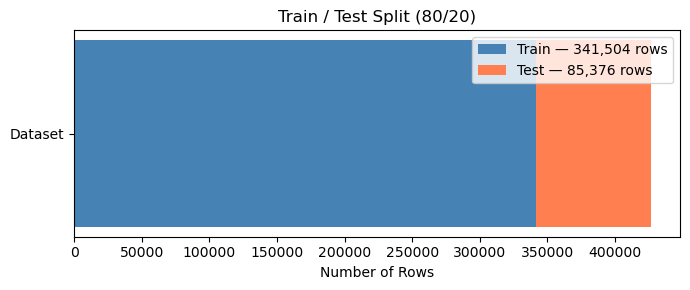

In [82]:
# TRAIN/TEST SPLIT
# ═══════════════════════════════════════════════════════════════════
# Before any model training, we split the dataset into training and 
# test sets. The model learns exclusively from training data and is 
# evaluated on the unseen test set to measure real-world performance.
# An 80/20 split is standard for large datasets like this one.
# ═══════════════════════════════════════════════════════════════════

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y,
    test_size=0.2,
    random_state=42
)

print("=== Train/Test Split ===")
print(f"Total samples:  {X_transformed.shape[0]:,}")
print(f"Training set:   {X_train.shape[0]:,} rows (80%)")
print(f"Test set:       {X_test.shape[0]:,} rows (20%)")
print(f"Features:       {X_train.shape[1]}")

# Visualize split
fig, ax = plt.subplots(figsize=(7, 3))
ax.barh(['Dataset'], [X_train.shape[0]], color='steelblue', 
        label=f'Train — {X_train.shape[0]:,} rows')
ax.barh(['Dataset'], [X_test.shape[0]], left=[X_train.shape[0]], 
        color='coral', label=f'Test — {X_test.shape[0]:,} rows')
ax.set_xlabel('Number of Rows')
ax.set_title('Train / Test Split (80/20)')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

Clean split! Here's what we got:
1. 426,880 total samples split cleanly 80/20
2. 341,504 rows for training — plenty of data for the models to learn from
3. 85,376 rows for testing — a large enough holdout for reliable evaluation
4. 63 features after all our encoding and engineering work


=== PCA Analysis ===
Original features:                     63
Components for 90% variance explained: 20
Components for 95% variance explained: 27


FileNotFoundError: [Errno 2] No such file or directory: 'images/pca_explained_variance.png'

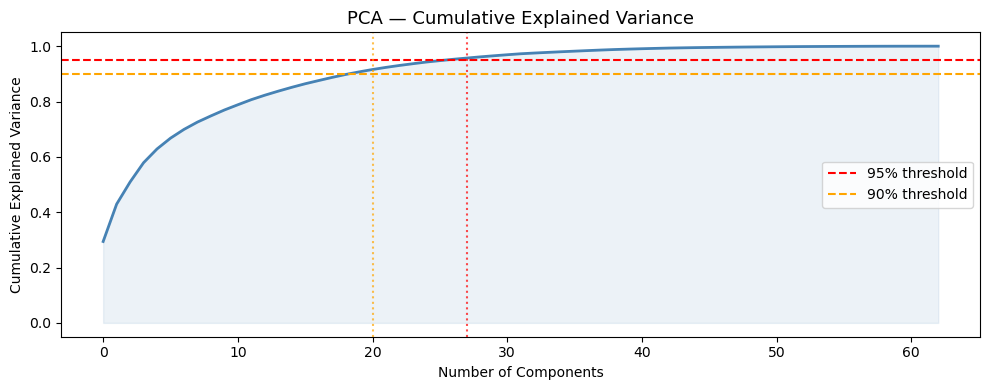

In [83]:
# PCA — DIMENSIONALITY REDUCTION
# ═══════════════════════════════════════════════════════════════════
# With 63 features after encoding, many columns may be correlated
# (especially one-hot encoded columns from the same category).
# PCA reduces the feature space to the most informative directions
# of variance, addressing multicollinearity and speeding up training.
# IMPORTANT: PCA is fitted only on training data to prevent leakage.
# ═══════════════════════════════════════════════════════════════════


# ── Fit PCA on training data only ───────────────────────────────────
# ── Fit PCA on training data only ────────────────────────────────────
pca_full = PCA().fit(X_train)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print("\n=== PCA Analysis ===")
print(f"Original features:                     {X_train.shape[1]}")
print(f"Components for 90% variance explained: {n_components_90}")
print(f"Components for 95% variance explained: {n_components_95}")

# ── Visualization: Cumulative Explained Variance ──────────────────────
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(cumulative_variance, color='steelblue', linewidth=2)
ax.axhline(0.95, color='red', linestyle='--', label='95% threshold')
ax.axhline(0.90, color='orange', linestyle='--', label='90% threshold')
ax.axvline(n_components_95, color='red', linestyle=':', alpha=0.7)
ax.axvline(n_components_90, color='orange', linestyle=':', alpha=0.7)
ax.fill_between(range(len(cumulative_variance)), cumulative_variance, alpha=0.1, color='steelblue')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.set_title('PCA — Cumulative Explained Variance', fontsize=13)
ax.legend()
plt.tight_layout()
plt.savefig('images/pca_explained_variance.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: images/pca_explained_variance.png")

# ── Apply PCA keeping 95% variance ───────────────────────────────────
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)  # transform only, never fit on test

print(f"\nAfter PCA:")
print(f"  Training set shape: {X_train_pca.shape}")
print(f"  Test set shape:     {X_test_pca.shape}")
print(f"  Features reduced:   {X_train.shape[1]} → {X_train_pca.shape[1]}")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.